In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [32]:
TAXAS_URL = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'

taxas = pd.read_csv(TAXAS_URL, sep=';', decimal=',')
taxas_ipca = taxas.loc[taxas['Tipo Titulo'] == 'Tesouro IPCA+', taxas.columns[:4]]

taxas_ipca

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha
16,Tesouro IPCA+,15/05/2015,23/02/2006,7.62
17,Tesouro IPCA+,15/08/2024,23/02/2006,7.70
48,Tesouro IPCA+,15/05/2015,22/02/2006,7.67
49,Tesouro IPCA+,15/08/2024,22/02/2006,7.76
80,Tesouro IPCA+,15/08/2024,21/02/2006,7.85
...,...,...,...,...
148799,Tesouro IPCA+,15/05/2015,02/01/2006,8.66
148829,Tesouro IPCA+,15/08/2024,30/12/2005,8.84
148830,Tesouro IPCA+,15/05/2015,30/12/2005,8.65
148860,Tesouro IPCA+,15/05/2015,29/12/2005,8.65


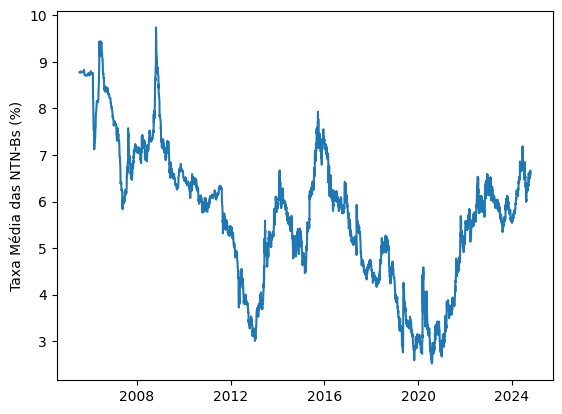

In [33]:
taxas_ipca['Data Base'] =  pd.to_datetime(taxas_ipca['Data Base'], dayfirst=True)
taxas_ipca_diario = taxas_ipca.groupby(['Data Base'])['Taxa Compra Manha'].mean()

plt.plot(taxas_ipca_diario, color='tab:blue')
plt.ylabel('Taxa Média das NTN-Bs (%)')
plt.show()

In [34]:
ibov_prices = yf.Ticker('^BVSP').history(start=taxas_ipca_diario.index[0])['Close']
ibov_prices.index = pd.to_datetime(ibov_prices.index).date

serie_historica = pd.merge(ibov_prices, taxas_ipca_diario, left_index=True, right_index=True, how='left')
serie_historica['Taxa Compra Manha'] = serie_historica['Taxa Compra Manha'].ffill()

serie_historica

,Close,Taxa Compra Manha
2005-07-18,25321.0,8.7750
2005-07-19,25271.0,8.7750
2005-07-20,25705.0,8.7750
2005-07-21,25842.0,8.7750
2005-07-22,25391.0,8.7750
...,...,...
2024-10-14,131005.0,6.5475
2024-10-15,131043.0,6.5350
2024-10-16,131750.0,6.5900
2024-10-17,130793.0,6.6650


In [46]:
window_size = 252
rolling_returns = []
ipca6_returns = []

for i in range(window_size, len(serie_historica) + 1):
    window = serie_historica.iloc[i - window_size:i]
    ibov_return = window['Close'].iloc[[0, -1]].pct_change().iloc[-1]

    rolling_returns.append(ibov_return)
    
    if window.iloc[0, 1] >= 6.5:
        ipca6_return = window['Close'].iloc[[0, -1]].pct_change().iloc[-1]
        ipca6_returns.append(ibov_return)

print(np.mean(rolling_returns))
print(np.mean(ipca6_returns))

0.05422875277750611
0.12249245837834898
